# Using `Logistic Regression` — Scikit Learn

In [8]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
%matplotlib inline

# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

In [3]:
ROWS = 64
COLS = 64
CHANNELS = 3

## Data Preparation

### Train data

In [7]:

train_data_mask = "data/train_dataset/with_mask"
train_data_no_mask = "data/train_dataset/without_mask"
train_data_dir_mask = os.path.join(train_data_mask)
train_data_dir_no_mask = os.path.join(train_data_no_mask)

# Creating a list of filenames in each directory
train_data_name_mask = os.listdir(train_data_dir_mask)
train_data_name_no_mask = os.listdir(train_data_dir_no_mask)

# get the directory to each image file in the testset
train_pics_mask = [os.path.join(train_data_dir_mask, filename) for filename in train_data_name_mask]

train_pics_no_mask = [os.path.join(train_data_dir_no_mask, filename) for filename in train_data_name_no_mask]

# Merge the two lists
train_merged_list = train_pics_mask + train_pics_no_mask

### Test data

In [6]:
test_data_mask = "data/test_dataset/with_mask"
test_data_no_mask = "data/test_dataset/without_mask"
test_data_dir_mask = os.path.join(test_data_mask)
test_data_dir_no_mask = os.path.join(test_data_no_mask)

# Creating a list of filenames in each directory
test_data_name_mask = os.listdir(test_data_dir_mask)
test_data_name_no_mask = os.listdir(test_data_dir_no_mask)

# get the directory to each image file in the testset
test_pics_mask = [os.path.join(test_data_dir_mask, filename) for filename in test_data_name_mask]

test_pics_no_mask = [os.path.join(test_data_dir_no_mask, filename) for filename in test_data_name_no_mask]

# Merge the two lists
test_merged_list = test_pics_mask + test_pics_no_mask

### Validation data

In [5]:
val_data_mask = "data/validation_dataset/with_mask"
val_data_no_mask = "data/validation_dataset/without_mask"
val_data_dir_mask = os.path.join(val_data_mask)
val_data_dir_no_mask = os.path.join(val_data_no_mask)

# Creating a list of filenames in each directory
val_data_name_mask = os.listdir(val_data_dir_mask)
val_data_name_no_mask = os.listdir(val_data_dir_no_mask)

# get the directory to each image file in the testset
val_pics_mask = [os.path.join(val_data_dir_mask, filename) for filename in val_data_name_mask]

val_pics_no_mask = [os.path.join(val_data_dir_no_mask, filename) for filename in val_data_name_no_mask]

# Merge the two lists
val_merged_list = val_pics_mask + val_pics_no_mask

### We define a function to reads the image at a given file path using `OpenCV` (cv2).

In [7]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

### Define a function which takes the list of all the image path and prepare the data in the format needed by the Scikit Learn Logistic Regression method.

In [8]:
def data_preparation(images):
  s = len(images)
  dim = ROWS * COLS * CHANNELS
  
  X = np.ndarray((dim, s), dtype=np.uint8)
  y = np.zeros((1, s))
  print("X.shape is {}".format(X.shape))
  
  for i, image_file in enumerate(images) :
    image = read_image(image_file)
    X[:, i] = np.squeeze(image.reshape((dim, 1)))
    if 'with_mask' in image_file.lower() :
      y[0, i] = 0
    elif 'without_mask' in image_file.lower() :
      y[0, i] = 1
    else : # for validation data
      y[0, i] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, s))
    
  return X,y

### Call function to prepare our training and validation data into the format needed by the Scikit Learn Logistic Regression method.

In [9]:
X_train, y_train = data_preparation(train_merged_list)
X_val, val_idx = data_preparation(val_merged_list)

In [24]:
l_classes = {0: 'with_mask', 1: 'without_mask'}

## Implementation of a Logistic Regression Model using Scikit Learn

In [12]:
l_model = LogisticRegressionCV()

# Taking the transpose of the X_train and y_train
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()

# Training the model using the fit method of the LogisticRegression
l_model.fit(X_train_lr, y_train_lr)

LogisticRegressionCV()

### Model Accuracy

In [13]:
print("Model accuracy: {:.2f}%".format(l_model.score(X_train_lr, y_train_lr)*100))

## Testing the Trained Model on the Test Data

Define a function that takes an index of an image from the test dataset and trained model as an argument and shows a plot indicating the image and our model prediction.

In [31]:
def image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)

  # predict image label
  predicted = l_model.predict(image)
  image_class = l_classes[predicted.item()]

  # Shape image for plot
  image = image.reshape((ROWS, COLS, CHANNELS))
  
  plt.title("Test {} : Predicted: {}".format(idx, image_class))
  plt.imshow(image)
  plt.show()
 

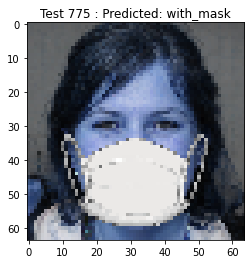

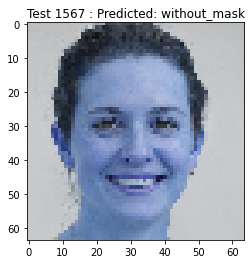

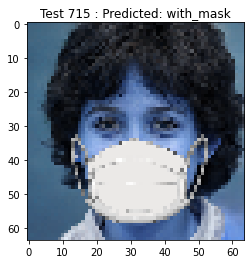

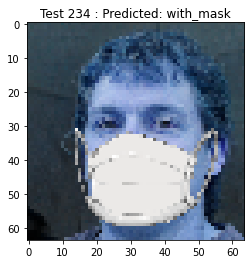

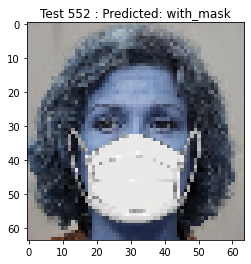

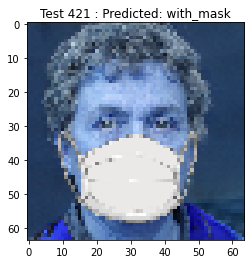

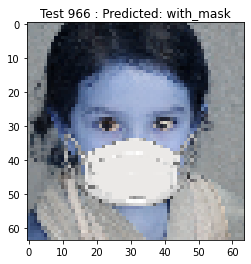

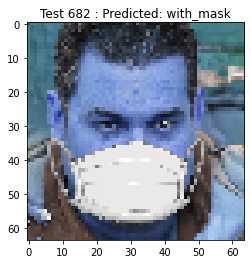

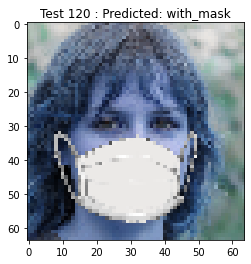

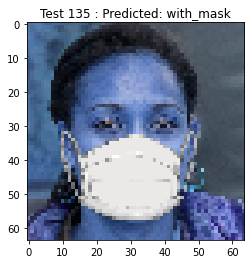

In [32]:
# Predict 10 random images
X_val_lr, val_idx = X_val.T, val_idx.T

for i in np.random.randint(0, len(X_val_lr), 10) :
  image_prediction(X_val_lr, i, l_model)



## Conclusion
The feature set for each image is of size 12288, which can be large for datasets with large image sizes and can lead to overfitting for the model.
<br>
<br>
The Logistic Regression Model performs worst than the previous models. Even though the accuracy is 100%, we lost several features from the images.
Due to the large resolution of the images, which converts to a large feature vector for each image, logistic regression models do not perform well on computer vision applications. 
<br>
<br>
The main reason for this behavior is the massive amount of weights to be trained during backpropagation. We could further improve our accuracy by a significant amount using data augmentation.

## References
1. Linear Classifiers in Python, Datacamp, https://learn.datacamp.com/courses/linear-classifiers-in-python

2. Kaggle “Dogs vs. Cats” Challenge — Complete Step by Step Guide — Part 1, Rajat Garg, https://medium.com/@mrgarg.rajat/kaggle-dogs-vs-cats-challenge-complete-step-by-step-guide-part-1-a347194e55b1

# `Decision Tree Classifier` - Scikit-learn
A decision tree is not adequate for our image classification task. To make it work we will transform our images Convert our images into the following list:
<br>
images with mask <- 0
lable <- mask
<br>
images without mask <- 1
label <- without_mask
<br>
{"images": [], "label": []}

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO 
from IPython.display import Image  
import pydotplus

### Define function to convert images to usable list

In [2]:

def convert(images, data_convert):
    for i, image_file in enumerate(images) :
        #image = read_image(image_file)
        #X[:, i] = np.squeeze(image.reshape((dim, 1)))
        if 'with_mask' in image_file.lower() :
            data_convert["images"].append(0)
            data_convert["label"].append("mask")
        elif 'without_mask' in image_file.lower() :
            data_convert["images"].append(1)
            data_convert["label"].append("no_mask")

In [3]:
# Define our datasets
train_data_convert = {"images": [], "label": []}
val_data_convert = {"images": [], "label": []}

In [11]:
# Conversion
convert(train_merged_list, train_data_convert)
convert(val_merged_list, val_data_convert)

In [12]:
# Transform to dataframe
d_train_data = pd.DataFrame(train_data_convert, columns = ['images', 'label'])
d_val_data = pd.DataFrame(val_data_convert, columns = ['images', 'label'])

In [95]:
d_train_data.head()

,images,label
0,0,mask
1,0,mask
2,0,mask
3,0,mask
4,0,mask


In [96]:
X_train = d_train_data[['images']].values
X_test = d_val_data[['images']].values
y_train = d_train_data['label'].values
y_test = d_val_data['label'].values

## Building Decision Tree Model
With Optimized Decision Tree Performance

In [97]:
# Create Decision Tree classifer object
d_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
d_model = d_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = d_model.predict(X_test)


## Evaluating Model

In [98]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

## Visualizing Decision Trees

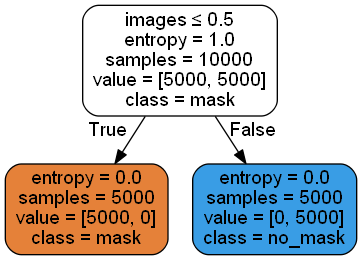

In [99]:
dot_data = StringIO()
export_graphviz(d_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['images'],class_names=['mask','no_mask'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('facemaskdetect.png')
Image(graph.create_png())

## Conclusion
This model is not optimal for classification.
Decision trees are easy to interpret and visualize. They can easily capture Non-linear patterns in the data and require less data preprocessing than the other models; for example, there is no need to normalize.
It can be used for feature engineering, such as predicting missing values, suitable for variable selection. It has no assumptions about distribution because of the non-parametric nature of the algorithm.
<br>
However, decision tree models are sensitive to noise in data and can easily overfit.
Decision trees are biased when the dataset is imbalanced—slight variations in the data.

# XGBoost Classification
Using the previously transformed dataset.
<br>
Usually, to use XGBoost on a dataset with categorical features, we may want to consider applying some encoding (like one-hot encoding) before training the model. Also, if there were missing values, we could let the XGBoost handle them or devise a proper treatment.

In [9]:
import xgboost as xgb
from xgboost import plot_tree
from sklearn.metrics import mean_squared_error

In [79]:
d_train_data.info()

In [13]:
x_train_data = d_train_data.replace(["mask", "no_mask"], [0, 1])
x_val_data = d_val_data.replace(["no_mask", "mask"], [1, 0])

In [14]:
X_train_xg = x_train_data[['images']].values
X_test_xg = x_val_data[['images']].values
y_train_xg = x_train_data['label'].values
y_test_xg = x_val_data['label'].values

### Building the model
Building the model with binary:logistic loss function. The percentage of features used per tree is 1%. Number of trees are 10, maximum depth is 3.

In [15]:
x_model = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 3, alpha = 10, n_estimators = 10)

### Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

In [16]:
x_model.fit(X_train_xg, y_train_xg)

preds = x_model.predict(X_test_xg)

In [17]:
# Mean square error
rmse = np.sqrt(mean_squared_error(y_test_xg, preds))
print("RMSE: %f" % (rmse))

Mean square error is 0.18

### Visualize Boosting Trees and Feature Importance

In [18]:
data_dmatrix = xgb.DMatrix(data=X_train_xg,label=y_train_xg)

In [19]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 3, 'alpha': 10}
xv_model = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

### Plotting the first tree with the matplotlib library

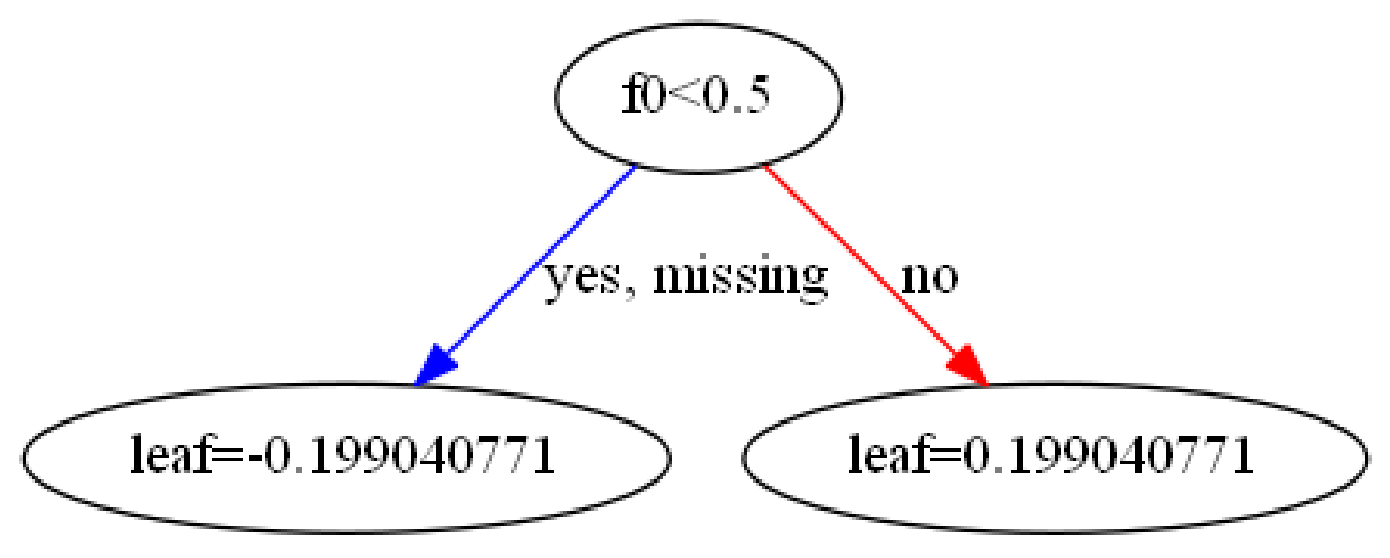

In [21]:
plot_tree(xv_model, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

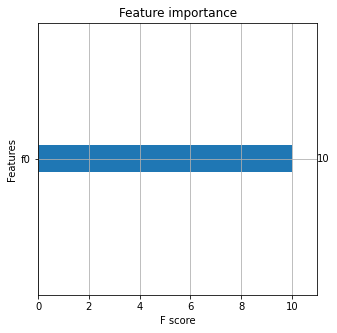

In [23]:
xgb.plot_importance(xv_model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

Obviously, since we only had one feature, it has the highest importance score.

## Conclusion
We transformed our dataset and applied XGBoost. This model is not appropriate for our use case since we only have a single feature.
<br>
XGBoost is usually used when you have a large number of training samples, Greater than 1000 training samples, and less than 100 features. The number of features < number of training samples(Which is not our case) You have a mixture of categorical and numeric features Or just numeric attributes.

# References
1. Decision Tree Classification in Python, Avinash Navlani, https://www.datacamp.com/community/tutorials/decision-tree-classification-python

2. Using XGBoost in Python, Manish Pathak, https://www.datacamp.com/community/tutorials/xgboost-in-python

3. Extreme Gradient Boosting with XGBoost, Datacamp, https://learn.datacamp.com/courses/extreme-gradient-boosting-with-xgboost
